<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Môn học:</strong> Trực quan hóa dữ liệu</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Lớp:</strong> 22KHDL</div>
        <div></div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Thành viên:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td>22127008</td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>4</td>
                <td>22127170</td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">LAB 01</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">THU THẬP DỮ LIỆU VÀ TRỰC QUAN HÓA DỮ LIỆU</div>
</div>

# **Mục lục**

- [**Giới thiệu**](#intro)
    - [Mục tiêu đồ án](#objectives)
    - [Thông tin dữ liệu](#data)
- [**Thư viện sử dụng**](#packages)
- [**Thu thập dữ liệu**](#collect)
- [**Khám phá dữ liệu**](#eda)
    - [**Tổng quan về dữ liệu**](#eda1)
        - [**Đối với `raw_df`**](#eda11)
        - [**Đối với `top_50_df`**](#eda12)
    - [**EDA và tiền xử lí dữ liệu - `raw_df`**](#eda2)
        - [**Thống kê mô tả**](#eda21)
        - [**Phân bố của dữ liệu dạng số**](#eda22)
        - [**Phân bố của dữ liệu dạng phân loại**](#eda23)
    - [**EDA và tiền xử lí dữ liệu -`top_50_df`**](#eda3)
- [**Trực quan hóa dữ liệu**](#visual)


<a id="intro"></a>
# **I. Giới thiệu**
<a id="objectives"></a>
## **1. Mục tiêu phân tích:**
- Thị hiếu âm nhạc của người nghe ở thị trường Việt Nam
<a id="data"></a>
## **2. Thông tin dữ liệu:**


<a id="packages"></a>
# **II. Thư viện sử dụng**

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns

<a id="collect"></a>
# **III. Thu thập dữ liệu**

Với việc thu thập được dữ liệu về các bài hát trên ứng dụng nghe nhạc trực tuyến NhacCuaTui, sau khi nhóm đã khảo sát và tìm hiểu về NhacCuaTui, nhóm đã có mục tiêu ban đầu cho việc thu thập dữ liệu là sẽ lấy tất cả các thông tin về bài hát mà có thể lấy được từ trang web NhacCuaTui, bao gồm:
- URL
- Tên bài hát
- Tên ca sĩ
- Thể loại
- Xuât xứ
- Nhạc sĩ
- Lời bài hát
- Thời lượng
- Chất lượng âm thanh

Với mục tiêu này, việc thu thập dữ liệu sẽ được thực hiện với sự hỗ trợ của thư viện `BeautifulSoup` và `requests` trong Python vì đây là một trang web tĩnh, không yêu cầu đăng nhập. Biến `BASE_URL` sẽ được sử dụng để lưu trữ URL của route đầu tiên của NhacCuaTui cần sử dụng để thu thập dữ liệu. Tại route này chúng ta sẽ thu thập các thể loại nhạc có trên trang web, cũng như đường dẫn của mỗi thể loại và xuất xứ của các bài hát, để từ đó có thể lấy được các bài hát của mỗi thể loại khác nhau. Ở đây, chúng ta sẽ không lấy thể loại `Tui hát` vì thể loại này không phải là thể loại chính thức mà là thể loại mà người dùng tự tạo. Hàm `get_music_types` sẽ được sử dụng để làm điều này, hàm trả về một danh sách các thể loại nhạc có trên trang web, url và xuất xứ của thể loại đó.

In [102]:
BASE_URL = "https://www.nhaccuatui.com/bai-hat/bai-hat-moi.html"

def get_music_types():
    response = requests.get(BASE_URL)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    music_types = []
    menu_browsing = soup.find_all('ul', class_='detail_menu_browsing_dashboard')
    
    for menu in menu_browsing:
        categories = menu.find_all('li', class_='cate')
        for category in categories:
            origin = category.find('a').text.strip()
            subcategories = category.find_next_siblings('li')
            for subcategory in subcategories:
                if subcategory.get('class') and 'line' in subcategory.get('class'):
                    break
                music_type = subcategory.find('a')
                if music_type:
                    title = music_type.text.strip()
                    url = music_type.get('href')
                    music_types.append((title, url, origin))
    
    return music_types

Các thể loại nhạc, đường dẫn và xuất xứ tại trang web NhacCuaTui được lưu trữ trong biến `music_types` nhận giá trị trả về từ hàm `get_music_types()`.

In [106]:
music_types = get_music_types()
pd.DataFrame(music_types, columns=['genre', 'url', 'origin'])

,genre,url,origin
0,Nhạc Trẻ,https://www.nhaccuatui.com/bai-hat/nhac-tre-mo...,VIỆT NAM
1,Trữ Tình,https://www.nhaccuatui.com/bai-hat/tru-tinh-mo...,VIỆT NAM
2,Remix Việt,https://www.nhaccuatui.com/bai-hat/remix-viet-...,VIỆT NAM
3,Rap Việt,https://www.nhaccuatui.com/bai-hat/rap-viet-mo...,VIỆT NAM
4,Tiền Chiến,https://www.nhaccuatui.com/bai-hat/tien-chien-...,VIỆT NAM
5,Nhạc Trịnh,https://www.nhaccuatui.com/bai-hat/nhac-trinh-...,VIỆT NAM
6,Rock Việt,https://www.nhaccuatui.com/bai-hat/rock-viet-m...,VIỆT NAM
7,Cách Mạng,https://www.nhaccuatui.com/bai-hat/cach-mang-m...,VIỆT NAM
8,Pop,https://www.nhaccuatui.com/bai-hat/pop-moi.html,ÂU MỸ
9,Rock,https://www.nhaccuatui.com/bai-hat/rock-moi.html,ÂU MỸ


Theo kiểm tra từ trước thì với mỗi thể loại khác nhau, trang NhacCuaTui sẽ có 25 trang chứa các bài hát của thể loại đó. Nên để thu thập dữ liệu, chúng ta sẽ cần lặp qua từng trang của mỗi thể loại nhạc để lấy được url của các bài hát thuộc thể loại đó biết rằng url của mỗi trang thuộc mỗi thể loại có cấu trúc `https://www.nhaccuatui.com/bai-hat/{thể loại}.{page}.html` với `page` là thứ tự trang. Hàm `get_song_links` sẽ được sử dụng để xử lí điều này, hàm trả về một danh sách các url của các bài hát thuộc thể loại nhạc đang xét.

In [115]:
def get_song_links(music_type_url, pages=25):
    song_links = []
    for page in range(1, pages + 1):
        url = f"{music_type_url[:-5]}.{page}.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        for a in soup.select('.list_music_full .info_song a.name_song'):
            song_links.append(a.get('href'))
    
    return song_links

Tiếp theo, ta sẽ lấy thông tin của mỗi bài hát từ url của bài hát đó. Cụ thể, ta sẽ lấy thông tin về tên bài hát, tên ca sĩ, thể loại, xuất xứ, nhạc sĩ, lời bài hát, thời lượng và chất lượng âm thanh của bài hát. Trong hàm `scrape_song_data`, ta sẽ sử dụng thư viện `BeautifulSoup` để phân tích pháp HTML của trang web và lấy thông tin cần thiết từ trang web. Hàm trả về thông tin của từng bài hát.

In [159]:
def scrape_song_data(song_url):
    response = requests.get(song_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    name = soup.select_one('.detail_info_playing_now b').text
    artist = soup.select_one('.detail_info_playing_now .name_singer').text if soup.select_one('.detail_info_playing_now .name_singer') else 'N/A'

    composer_element = soup.find('p', string=lambda x: x and 'Nhạc sĩ:' in x)
    composer = composer_element.text.split(': ')[1] if composer_element else 'N/A'
    
    lyrics = soup.select_one('#divLyric').text.strip() if soup.select_one('#divLyric') else 'N/A'
    
    duration = soup.select_one('meta[itemprop="duration"]').get('content')

    return {
        'url': song_url,
        'name': name,
        'artist': artist,
        'composer': composer,
        'lyrics': lyrics,
        'duration': duration,
    }

Bây giờ, chúng ta sẽ thực hiện thu thập dữ liệu từ trang web NhacCuaTui bằng cách sử dụng các hàm đã được xây dựng với các logic đã đề cập ở trên. Song, để tránh việc bị ngắt kết nối với trang web hay bị chặn IP, chúng ta sẽ sử dụng try-except để xử lí các trường hợp này, tránh phải thu thập lại từ đầu. Đồng thời trong lúc lặp qua các thể loại nhạc, chúng ta sẽ thêm các trường `genre`, `origin` vào dữ liệu để biết được bài hát thuộc thể loại và xuất xứ nào. Tất cả thông tin về bài hát sẽ được lưu vào biến `all_songs`.

In [ ]:
all_songs = []

for title, url, origin in music_types:
    try:
        song_links = get_song_links(url)
        for song_link in song_links:
            song_data = scrape_song_data(song_link)
            song_data['genre'] = title
            song_data['origin'] = origin
            all_songs.append(song_data)
            print(len(all_songs))
    except Exception as e:
        print(f"Error: {e}")

Vậy là chúng ta đã thu thập xong được dữ liệu từ trang web NhacCuaTui, trước khi chuyển đến phần tiếp theo - Khám phá dữ liệu, chúng ta sẽ chuyển `all_songs` thành DataFrame và lưu dữ liệu vào file `song_data.csv` để sử dụng sau này, tranh việc phải thu thập lại từ đầu.

In [200]:
raw_df = pd.DataFrame(all_songs)
raw_df.sample(5)

,url,name,artist,composer,lyrics,duration,genre,origin
12968,https://www.nhaccuatui.com/bai-hat/valori-aggi...,Valori aggiunti,Tutti Fenomeni,N/A,- Hiện chưa có lời bài hát nào cho Valori aggi...,PT2M54S,Indie,ÂU MỸ
9342,https://www.nhaccuatui.com/bai-hat/private-isl...,Private Island,Gunna,N/A,"I'm just kickin' it with a baddie, smokin' on ...",PT2M12S,R&B/Hip Hop/Rap,ÂU MỸ
3896,https://www.nhaccuatui.com/bai-hat/mot-trai-ti...,Một Trái Tim Một Quê Hương,Trần Hồng Kiệt,N/A,Bài hát: Một Trái Tim Một Quê Hương - Trần Hồn...,PT5M6S,Tiền Chiến,VIỆT NAM
3493,https://www.nhaccuatui.com/bai-hat/con-thuyen-...,Con Thuyền Không Bến,Ái Xuân (NSƯT),N/A,Bài hát: Con Thuyền Không Bến - Ái Xuân\n\nĐêm...,PT6M15S,Tiền Chiến,VIỆT NAM
14785,https://www.nhaccuatui.com/bai-hat/twenty-five...,"Twenty-five, Twenty-one",Jaurim,N/A,- Hiện chưa có lời bài hát nào cho Twenty-five...,PT4M47S,Nhạc Hàn,CHÂU Á


Với bộ dữ liệu này và vì mục đích của nhóm là trực quan hóa và phân tích về xu hướng âm nhạc nên nhóm sẽ thu thập dữ liệu bảng xếp hạng bài hát vì không thể thu thập được số lượt nghe của bài.

In [86]:
url = 'https://v11.nhaccuatui.com/bai-hat/top-20.1-5-d55-2025.html'

response = requests.get(url)
response.raise_for_status()

soup = BeautifulSoup(response.content, 'html.parser')

# Tìm list của bài hát
list_songs = soup.find_all('div', class_='list_chart_page')[0].find('div', class_='box_resource_slide')
songs = list_songs.find_all('ul', class_='list_show_chart')[0].find_all('li')

# Lấy từng bài một
song_chart = []
for song in songs:
    rank = song.find('span', class_='chart_tw').text.strip()
    name = song.find('a', class_='name_song').text.strip()
    artist = song.find('h4', class_='list_name_singer').text.strip()
    song_url = song.find('a', class_='name_song')['href']
    
    song_chart.append({
        'rank': rank,
        'name': name,
        'artist': artist,
        'url': song_url
    })
    
# Chuyển dữ liệu về dataframe
chart_50_df = pd.DataFrame(song_chart)
chart_50_df.sample(5)

,rank,name,artist,url
21,22,ANH TRAI HIP HOP,"RAP VIỆT, B Ray, Hustlang Robber, Gill",https://v11.nhaccuatui.com/bai-hat/anh-trai-hi...
33,34,APT.,"ROSÉ, Bruno Mars",https://v11.nhaccuatui.com/bai-hat/apt-rose-br...
39,40,TÌNH ĐẦU QUÁ CHÉN,"ANH TRAI ""SAY HI"", Quang Hùng MasterD, Negav, ...",https://v11.nhaccuatui.com/bai-hat/tinh-dau-qu...
5,6,Mất Kết Nối,Dương Domic,https://v11.nhaccuatui.com/bai-hat/mat-ket-noi...
17,18,Thương Thì Thôi (Ciray Remix),Jank,https://v11.nhaccuatui.com/bai-hat/thuong-thi-...


Để tái sử dụng dữ liệu, chúng ta sẽ xuất `raw_df` và `chart_50` vào file csv

In [ ]:
raw_df.to_csv('../data/raw_data.csv', index=False, encoding='utf-8', errors='surrogatepass')
chart_50_df.to_csv('../data/top_50_chart_vn.csv', index=False)

<a id="eda"></a>
# **IV. Khám phá dữ liệu**

Trước khi đến phần khám phá dữ liệu, chúng ta sẽ đọc dữ liệu từ file `raw_data.csv` đã lưu ở phần trước và bắt đầu khám phá.

In [10]:
raw_df = pd.read_csv('../data/raw_data.csv', encoding='utf-8')
raw_df.sample(5)

,url,name,artist,composer,lyrics,duration,genre,origin
11433,https://www.nhaccuatui.com/bai-hat/read-the-bi...,Read the Bible Every Day,Sons Of The Pioneers,NaN,- Hiện chưa có lời bài hát nào cho Read the Bi...,PT2M49S,Country,ÂU MỸ
1485,https://www.nhaccuatui.com/bai-hat/waiting-for...,Waiting For You (Fun Beach Festival Anthem),Hoaprox,NaN,- Hiện chưa có lời bài hát nào cho Waiting For...,PT5M42S,Remix Việt,VIỆT NAM
13124,https://www.nhaccuatui.com/bai-hat/true-lovers...,True Lovers (Live At Lone Star),Holy Holy,NaN,- Hiện chưa có lời bài hát nào cho True Lovers...,PT4M11S,Indie,ÂU MỸ
12712,https://www.nhaccuatui.com/bai-hat/el-campo-gr...,El Campo Grande,Los Olimarenos,NaN,- Hiện chưa có lời bài hát nào cho El Campo Gr...,PT2M13S,Latin,ÂU MỸ
1631,https://www.nhaccuatui.com/bai-hat/bat-coc-con...,Bắt Cóc Con Tim (Bum Remix),Lou Hoàng,NaN,- Hiện chưa có lời bài hát nào cho Bắt Cóc Con...,PT3M38S,Remix Việt,VIỆT NAM


In [11]:
top_50_df = pd.read_csv('../data/top_50_chart_vn.csv', encoding='utf-8')
top_50_df.sample(5)

,rank,name,artist,url
40,41,Mantra,JENNIE,https://v11.nhaccuatui.com/bai-hat/mantra-jenn...
20,21,Trương Đình Hoàng (SS x AM Remix),Lil Van,https://v11.nhaccuatui.com/bai-hat/truong-dinh...
2,3,earthquake,JISOO,https://v11.nhaccuatui.com/bai-hat/earthquake-...
6,7,Ánh Mắt Biết Cười,"Quang Hùng MasterD, Tăng Duy Tân",https://v11.nhaccuatui.com/bai-hat/anh-mat-bie...
41,42,"Đi Giữa Trời Rực Rỡ (From ""Đi Giữa Trời Rực Rỡ"")",Ngô Lan Hương,https://v11.nhaccuatui.com/bai-hat/di-giua-tro...


<a id="eda1"></a>
## **1. Tổng quan về dữ liệu**

<div id='eda11'></div>

### **Đối với `raw_df`**
Ở phần này thì chúng ta sẽ khám phá về cấu trúc của dữ liệu. Đầu tiên, chúng ta sẽ kiểm tra số dòng và số cột của dữ liệu để chắc rằng dữ liệu phù hợp với yêu cầu về cấu trúc của bài (hơn 3000 dòng trước tiền xử lí).

**Kích thước dữ liệu:**

In [12]:
print(f"Number of rows: {raw_df.shape[0]}")
print(f"Number of columns: {raw_df.shape[1]}")

Number of rows: 20276
Number of columns: 8


Tiếp theo, chúng ta sẽ kiểm tra xem kiểu dữ liệu của các cột trong dữ liệu để biết được cần phải xử lí kiểu dữ liệu của các cột nào trong dữ liệu ở phần tiền xử lí.

**Kiểu dữ liệu của các cột:**

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20276 entries, 0 to 20275
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       20276 non-null  object
 1   name      20276 non-null  object
 2   artist    20270 non-null  object
 3   composer  3303 non-null   object
 4   lyrics    19938 non-null  object
 5   duration  20276 non-null  object
 6   genre     20275 non-null  object
 7   origin    20275 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


**Thông tin về các cột trong dữ liệu**

Chúng ta có 8 cột trong dữ liệu, với tất cả các cột đều có kiểu dữ liệu là kiểu dữ liệu phân loại (object).
Ý nghĩa của các cột trong dữ liệu như sau:
- `url`: Đường dẫn của bài hát.
- `name`: Tên của bài hát.
- `artist`: Tên của ca sĩ.
- `composer`: Tên của nhạc sĩ.
- `lyrics`: Lời bài hát.
- `duration`: Thời lượng của bài hát.
- `genre`: Thể loại của bài hát.
- `origin`: Xuất xứ của bài hát.

Vậy cũng có nghĩa là, mỗi hàng trong dữ liệu sẽ chứa thông tin về một bài hát.

**Kiểm tra dữ liệu bị thiếu**

Ở phần này, chúng ta sẽ kiểm tra xem dữ liệu có bị thiếu không, nếu có thì chúng ta sẽ xử lí dữ liệu bị thiếu ở phần tiền xử lí để làm sạch dữ liệu.

In [14]:
print('Giá trị thiếu trong mỗi cột:')
print(raw_df.isnull().sum())

Giá trị thiếu trong mỗi cột:
url             0
name            0
artist          6
composer    16973
lyrics        338
duration        0
genre           1
origin          1
dtype: int64


**Kiểm tra dữ liệu bị trùng**

Ở phần này, chúng ta sẽ kiểm tra xem dữ liệu có bị trùng không, nếu có thì chúng ta sẽ xóa dữ liệu trùng.

In [15]:
print('Dữ liệu trùng lặp:')
print(raw_df.duplicated().sum())

Dữ liệu trùng lặp:
0


Vậy là giai đoạn thu thập dữ liệu làm khá tốt, không có dữ liệu bị trùng. Tiếp theo, chúng ta sẽ tiến hành khám phá xem có bao nhiêu giá trị khác nhau trong mỗi cột. Điều này nhằm giúp chúng ta hiểu rõ hơn về dữ liệu, đặc biệt là về `name`, `artist`, `composer`, `genre` và `origin`. Chúng ta không cần phải khám phá về `url` vì mỗi bài hát sẽ có một url riêng. Tương tự với `lyrics`, còn `duration` có vẻ sẽ cần tiền xử lí để chuyển về dạng số giây để dễ xử lí hơn, nên chúng ta sẽ không khám phá về `duration` ở đây.

In [16]:
for col in ['name', 'artist', 'composer', 'genre', 'origin']:
    print(f"{col}: {raw_df[col].nunique()} giá trị khác nhau")

name: 18443 giá trị khác nhau
artist: 6739 giá trị khác nhau
composer: 1622 giá trị khác nhau
genre: 24 giá trị khác nhau
origin: 4 giá trị khác nhau


### **Đối với `top_50_df`**
<div id='eda12'></div>
Tương tự như trên, chúng ta sẽ kiểm tra số lượng dòng, cột của dữ liệu.

**Kích thước dữ liệu:**

In [17]:
print(f"Number of rows: {top_50_df.shape[0]}")
print(f"Number of columns: {top_50_df.shape[1]}")

Number of rows: 50
Number of columns: 4


Tiếp theo, chúng ta sẽ kiểm tra xem kiểu dữ liệu của các cột trong dữ liệu để biết được cần phải xử lí kiểu dữ liệu của các cột nào trong dữ liệu ở phần tiền xử lí.

**Kiểu dữ liệu của các cột:**

In [18]:
top_50_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rank    50 non-null     int64 
 1   name    50 non-null     object
 2   artist  50 non-null     object
 3   url     50 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


**Thông tin về các cột trong dữ liệu**

Chúng ta có 4 cột trong dữ liệu, với tất cả các cột đều có kiểu dữ liệu là kiểu dữ liệu phân loại (object) ngoại trừ `rank` có kiểu dữ liệu là int64.
Ý nghĩa của các cột trong dữ liệu như sau:
- `rank`: Thứ hạng của bài hát.
- `name`: Tên của bài hát.
- `artist`: Tên của ca sĩ.
- `url`: Đường dẫn của bài hát.

Vậy cũng có nghĩa là, mỗi hàng trong dữ liệu sẽ chứa thông tin về một bài hát.

**Kiểm tra dữ liệu bị thiếu**

Ở phần này, chúng ta sẽ kiểm tra xem dữ liệu có bị thiếu không, nếu có thì chúng ta sẽ xử lí dữ liệu bị thiếu ở phần tiền xử lí để làm sạch dữ liệu.

In [19]:
top_50_df.isna().sum()

rank      0
name      0
artist    0
url       0
dtype: int64

Vậy là không có trường nào thiếu dữ liệu. Tiếp theo chúng ta sẽ kiểm tra trùng lặp.

**Kiểm tra trùng lặp**

In [20]:
print('Dữ liệu trùng lặp:')
print(top_50_df.duplicated().sum())

Dữ liệu trùng lặp:
0


Tập dữ liệu này cũng không có dữ liệu trùng lặp

<a id="eda2"></a>
## **2. EDA và Tiền xử lí dữ liệu (`raw_df`)**

Phần này chúng ta sẽ phân tích sâu hơn về tập dữ liệu để khám phá mẫu, phân phối và mối quan hệ giữa các biến.

Đầu tiên, chúng ta sẽ đảm bảo rằng các trường dữ liệu được chuyển sang kiểu dữ liệu hợp lí của nó. Như đã xem xét ở phần trên, toàn bộ các trường dữ liệu đều thuộc kiểu phân loại. Tuy nhiên, liệu tất cả các trường đều thích hợp với kiểu dữ liệu phân loại không? Để trả lời câu hỏi này, chúng ta sẽ xem lại dữ liệu.

In [21]:
raw_df.head(5)

,url,name,artist,composer,lyrics,duration,genre,origin
0,https://www.nhaccuatui.com/bai-hat/re-ndm-wtra...,Rê NDM,Wtran,"Wtran, Cà Nâu\n \n ...",Rê NDM – WTran ft. Cà Nâu\n\nWTran:\nChú bé lo...,PT3M15S,Nhạc Trẻ,VIỆT NAM
1,https://www.nhaccuatui.com/bai-hat/yeu-di-chau...,Yêu Đi,Châu Khải Phong,NaN,- Hiện chưa có lời bài hát nào cho Yêu Đi do c...,PT4M32S,Nhạc Trẻ,VIỆT NAM
2,https://www.nhaccuatui.com/bai-hat/diem-xui-da...,Điềm Xui,Daduc,Daduc\n \n ...,Daduc - Điềm Xui (We Broke Up Yesterday)\n\nth...,PT3M25S,Nhạc Trẻ,VIỆT NAM
3,https://www.nhaccuatui.com/bai-hat/mashup-we-d...,"Mashup We Don't Talk Anymore, Để Em Rời Xa (Bi...",Đức Phúc,NaN,NaN,PT4M58S,Nhạc Trẻ,VIỆT NAM
4,https://www.nhaccuatui.com/bai-hat/giu-em-that...,Giữ Em Thật Lâu,Naod,Naod\n \n ...,Bài hát: Giữ Em Thật Lâu - Naod\n\nCòn điều gì...,PT4M14S,Nhạc Trẻ,VIỆT NAM


Ta thấy rằng trường `duration` chứa thời lượng của bài hát với dạng chung là PT<phút>M<giây>S. Để dễ xử lí hơn, chúng ta sẽ chuyển trường `duration` về dạng int, đơn vị giây.

In [22]:
def duration_to_seconds(duration):
    match = re.match(r'PT(\d+)M(\d+)S', duration)
    if match:
        min = int(match.group(1))
        sec = int(match.group(2))
        return min * 60 + sec
    return 0

raw_df['duration'] = raw_df['duration'].apply(duration_to_seconds)
raw_df.sample(5)
display(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20276 entries, 0 to 20275
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       20276 non-null  object
 1   name      20276 non-null  object
 2   artist    20270 non-null  object
 3   composer  3303 non-null   object
 4   lyrics    19938 non-null  object
 5   duration  20276 non-null  int64 
 6   genre     20275 non-null  object
 7   origin    20275 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.2+ MB


None

Như chúng ta đã kiểm tra ở phần trên `composer`, `lyrics` thiếu ra khá nhiều giá trị, `artist` cũng có thiếu nhưng ít hơn. Chúng ta sẽ xử lí dữ liệu bị thiếu ở phần này.

In [23]:
raw_df.isna().sum()

url             0
name            0
artist          6
composer    16973
lyrics        338
duration        0
genre           1
origin          1
dtype: int64

Đối với các trường này, nguyên nhân chính là do trang web cho phép nghệ sĩ hoặc cộng đồng cập nhật `artist`, `composer` và `lyrics` nên không phải lúc nào cũng có 2 trường này. Tuy nhiên dữ liệu bị thiếu không thể chỉ phát hiện bằng hàm `isna()` mà còn phải kiểm tra xem có dòng chữ `- Hiện chưa có lời bài hát nào` vì trường `lyrics` sẽ chứa dòng chữ này nếu không có lời bài hát. Còn đối với `composer` và `artist`, nếu không có tên nhạc sĩ thì trường `composer` và `artist`sẽ có thể có `Various Artists` hoặc `VA` hoặc `N/A`.

In [24]:
def find_missing_lyrics_comp(col):
    missing_lyrics_df = raw_df[raw_df['lyrics'].str.contains('- Hiện chưa có lời bài hát nào', na=False)]
    missing_lyrics_num = missing_lyrics_df.shape[0] + raw_df['lyrics'].isna().sum()
    print(f"Số bài hát thiếu lời: {missing_lyrics_num}")
    print(f"Chiếm tỷ lệ: {missing_lyrics_num / raw_df.shape[0] * 100:.2f}%")

    missing_composer_df = raw_df[raw_df['composer'].isin(['N/A', 'VA', 'Various Artists'])]
    missing_composer_num = missing_composer_df.shape[0] + raw_df['composer'].isna().sum()
    print(f"Số bài hát không có nhạc sĩ: {missing_composer_num}")
    print(f"Chiếm tỷ lệ: {missing_composer_num / raw_df.shape[0] * 100:.2f}%")
    
    missing_artist_df = raw_df[raw_df['artist'].isin(['N/A', 'VA', 'Various Artists'])]
    missing_artist_num = missing_artist_df.shape[0] + raw_df['artist'].isna().sum()
    print(f"Số bài hát không có nhạc sĩ: {missing_artist_num}")
    print(f"Chiếm tỷ lệ: {missing_artist_num / raw_df.shape[0] * 100:.2f}%")
    
find_missing_lyrics_comp(raw_df)

Số bài hát thiếu lời: 13619
Chiếm tỷ lệ: 67.17%
Số bài hát không có nhạc sĩ: 16973
Chiếm tỷ lệ: 83.71%
Số bài hát không có nhạc sĩ: 574
Chiếm tỷ lệ: 2.83%


Số lượng dữ liệu bị thiếu ở `composer` và `lyrics` khá nhiều, tuy thế vì mục đích của nhóm là phân tích xu hướng âm nhạc của thị trường Việt Nam nên nhóm sẽ không xóa sample bị thiếu ở `composer` và `lyrics` mà sẽ giữ nguyên dữ liệu. Tuy nhiên, các giá trị bị thiếu ở `composer` và `lyrics` sẽ được thay thế bằng `Unknown` để thống nhất dữ liệu và dễ xử lí hơn.

In [25]:
raw_df['composer'] = raw_df['composer'].fillna('Unknown')
raw_df['lyrics'] = raw_df['lyrics'].fillna('Unknown')
raw_df.loc[raw_df['lyrics'].str.contains('- Hiện chưa có lời bài hát nào', na=False), 'lyrics'] = 'Unknown'
find_missing_lyrics_comp(raw_df)
print('\nNgoài ra, giá trị thiếu còn lại:')
display(raw_df.isna().sum())

Số bài hát thiếu lời: 0
Chiếm tỷ lệ: 0.00%
Số bài hát không có nhạc sĩ: 0
Chiếm tỷ lệ: 0.00%
Số bài hát không có nhạc sĩ: 574
Chiếm tỷ lệ: 2.83%

Ngoài ra, giá trị thiếu còn lại:


url         0
name        0
artist      6
composer    0
lyrics      0
duration    0
genre       1
origin      1
dtype: int64

Đối với `artist`, chúng ta cũng làm tương tự. Tuy nhiên số lượng dữ liệu bị thiếu ít hơn nên nhóm cũng chuyển các giá trị `Various Artists`, `VA`, `N/A` thành `Unknown` và xóa các sample bị thiếu (isna).

In [26]:
raw_df= raw_df.dropna(subset=['artist'])
raw_df.loc[raw_df['artist'].str.contains('Various Artists', na=False), 'artist'] = 'Unknown'
find_missing_lyrics_comp(raw_df)
raw_df.isna().sum()

Số bài hát thiếu lời: 0
Chiếm tỷ lệ: 0.00%
Số bài hát không có nhạc sĩ: 0
Chiếm tỷ lệ: 0.00%
Số bài hát không có nhạc sĩ: 0
Chiếm tỷ lệ: 0.00%


url         0
name        0
artist      0
composer    0
lyrics      0
duration    0
genre       1
origin      1
dtype: int64

Vậy là chúng ta đã xử lí xong dữ liệu bị thiếu, theo như đã tìm hiểu ở trên thì bộ dữ liệu cũng không có dữ liệu trùng nên chúng ta sẽ tiếp tục khám phá dữ liệu. Đầu tiên chúng ta sẽ xem lại dữ liệu sau khi xử lí.

In [27]:
raw_df.sample(5)

,url,name,artist,composer,lyrics,duration,genre,origin
15427,https://www.nhaccuatui.com/bai-hat/sau-nay-cua...,Sau Này Của Chúng Ta / 后来的你我 (Dj Danh Long Bản),Trương Hy Nhược (Zhang Xi Ruo),Unknown,Unknown,293,Nhạc Hoa,CHÂU Á
14322,https://www.nhaccuatui.com/bai-hat/my-finale-t...,My Finale (The Fabulous Ost),Seung Hee (Oh My Girl),Unknown,Unknown,195,Nhạc Hàn,CHÂU Á
14595,https://www.nhaccuatui.com/bai-hat/back-to-the...,Back To The Beginning Cover,Momo (Twice),Unknown,Unknown,158,Nhạc Hàn,CHÂU Á
1180,https://www.nhaccuatui.com/bai-hat/thuong-sao-...,Thương Sao Câu Hát Tình Quê,Hoàng Việt Trang,Unknown,Unknown,451,Trữ Tình,VIỆT NAM
4532,https://www.nhaccuatui.com/bai-hat/mot-coi-di-...,Một Cõi Đi Về,Thiên Phú,Unknown,Unknown,288,Nhạc Trịnh,VIỆT NAM


Có thể thấy ở `lyrics` và `composer`, có những kí tự đặc biệt như `\n`, `\r`, `\t`, `...` nên chúng ta sẽ xử lí dữ liệu ở trường `lyrics` và `composer` để loại bỏ các kí tự đặc biệt này.

In [28]:
raw_df['lyrics'] = raw_df['lyrics'].str.replace(r'[\n\r\t]', ' ', regex=True)
raw_df['lyrics'] = raw_df['lyrics'].str.replace(r'\.\.\.', '', regex=True)

raw_df['composer'] = raw_df['composer'].str.replace(r'[\n\r\t]', ' ', regex=True)
raw_df['composer'] = raw_df['composer'].str.replace(r'\.\.\.', '', regex=True)

raw_df.head(5)

,url,name,artist,composer,lyrics,duration,genre,origin
0,https://www.nhaccuatui.com/bai-hat/re-ndm-wtra...,Rê NDM,Wtran,"Wtran, Cà Nâu ...",Rê NDM – WTran ft. Cà Nâu WTran: Chú bé loắt ...,195,Nhạc Trẻ,VIỆT NAM
1,https://www.nhaccuatui.com/bai-hat/yeu-di-chau...,Yêu Đi,Châu Khải Phong,Unknown,Unknown,272,Nhạc Trẻ,VIỆT NAM
2,https://www.nhaccuatui.com/bai-hat/diem-xui-da...,Điềm Xui,Daduc,Daduc ...,Daduc - Điềm Xui (We Broke Up Yesterday) thôi...,205,Nhạc Trẻ,VIỆT NAM
3,https://www.nhaccuatui.com/bai-hat/mashup-we-d...,"Mashup We Don't Talk Anymore, Để Em Rời Xa (Bi...",Đức Phúc,Unknown,Unknown,298,Nhạc Trẻ,VIỆT NAM
4,https://www.nhaccuatui.com/bai-hat/giu-em-that...,Giữ Em Thật Lâu,Naod,Naod ...,Bài hát: Giữ Em Thật Lâu - Naod Còn điều gì e...,254,Nhạc Trẻ,VIỆT NAM


Có một số kí tự trong `lyrics` và `composer` không phải là kí tự có thể encode `utf-8` (lí do khi lưu file ban đầu đã phải sử dụng `errors='surrogatepass'`) nên chúng ta sẽ xóa các kí tự này.

In [29]:
def remove_non_utf8(text):
    return text.encode('utf-8', 'ignore').decode('utf-8')

raw_df['lyrics'] = raw_df['lyrics'].apply(remove_non_utf8)
raw_df['composer'] = raw_df['composer'].apply(remove_non_utf8)

raw_df.sample(5)

,url,name,artist,composer,lyrics,duration,genre,origin
4944,https://www.nhaccuatui.com/bai-hat/con-thay-ma...,Còn Thấy Mặt Người,Yoshi Imamura,Unknown,Unknown,306,Nhạc Trịnh,VIỆT NAM
921,https://www.nhaccuatui.com/bai-hat/lien-khuc-c...,Liên Khúc Cát Bụi,Diễm Ngân,Unknown,Unknown,403,Trữ Tình,VIỆT NAM
16629,https://www.nhaccuatui.com/bai-hat/girls-openi...,Girls (Opening Version),Kana Nishino,Unknown,Unknown,90,Nhạc Nhật,CHÂU Á
764,https://www.nhaccuatui.com/bai-hat/ve-di-ut-oi...,Về Đi Út Ơi,Hương Lan,Unknown,Unknown,368,Trữ Tình,VIỆT NAM
255,https://www.nhaccuatui.com/bai-hat/quen-cach-y...,Quên Cách Yêu,Oanh Tạ,Unknown,Từ bao lâu không thể nhớ Em đã không nói yêu t...,256,Nhạc Trẻ,VIỆT NAM


<a id="eda21"></a>
### **Thống kê mô tả**

Tiếp theo, chúng ta sẽ phân tích sâu hơn về tập dữ liệu để khám phá mẫu, phân phối và mối quan hệ giữa các biến.

Đầu tiên, chúng ta sẽ xem xét các thống kê mô tả cho các cột để có các giá trị: trung bình (mean), trung vị (median), giá trị nhỏ nhất (min), giá trị lớn nhất (max), tứ phân vị (quartile) của các cột dạng số. Chúng ta không cần lo lắng về giá trị bị thiếu ở các trường này vì đã xử lí ở phần trên.

In [30]:
raw_df.describe()

,duration
count,20270.000000
mean,233.384312
std,119.957557
min,0.000000
25%,183.000000
50%,223.000000
75%,272.750000
max,3344.000000


<a id="eda22"></a>
### **Phân bố của dữ liệu dạng số**

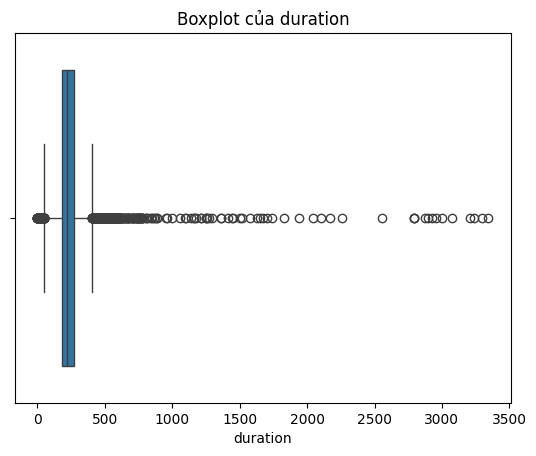

Giá trị ngoại lai của duration:
                                name  duration
221               Nhớ Thương Làm Chi        26
423                     Lk Chào Xuân       461
424                          Lk Xuân      1059
434    Liên Khúc: Chuyện Tình Bolero      1216
436                Vui Tết Miệt Vườn       548
...                              ...       ...
20212                   Day To Night         7
20213                     Kill Klesk         6
20214                     Angry Save         6
20222                        Pop Mix      1271
20224                      Italo Mix      1941

[637 rows x 2 columns]


In [31]:
sns.boxplot(x=raw_df['duration'])
plt.title('Boxplot của duration')
plt.show()

# Calculate IQR for `duration` 
Q1 = raw_df['duration'].quantile(0.25)
Q3 = raw_df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_duration = raw_df[(raw_df['duration'] < lower_bound) | (raw_df['duration'] > upper_bound)]
if not outliers_duration.empty:
    print("Giá trị ngoại lai của duration:")
    print(outliers_duration[['name', 'duration']])
else:
    print("Không có giá trị ngoại lai nào tìm được")

Chúng ta có thể thấy dữ liệu có một trường dữ liệu dạng số hiện tại là `duration`. Với các giá trị ngoại lai như trên ta có thể thấy được các giá trị ngoại lai này có thể ảnh hưởng đến phân bố. Tuy nhiên là chúng ta sẽ không xử lí các giá trị ngoại lai (loại bỏ nó hay scale lại) này ở đây mà sẽ phân tích kĩ hơn ở phần sau.

<a id="eda23"></a>
### **Phân bố của dữ liệu dạng phân loại**

Chúng ta đã kiểm tra dữ liệu thiếu ở phần trước nên phần này không phải bận tâm về nó nữa (missing_ratio = 0%). Đầu tiên chúng ta sẽ tính các giá trị như sau:
- Số lượng giá trị khác nhau trong mỗi trường, không tính giá trị thiếu: `num_values`
- Tỉ lệ các giá trị khác nhau trong mỗi trường, không tính giá trị thiếu: `value_ratios`

In [32]:
# Tìm các trường thuộc kiểu phân loại
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()

cat_col_info = {}

# Tính toán
for col in categorical_cols:    
    num_values = raw_df[col].nunique(dropna = True)
    
    # Tính số các giá trị và tỉ lệ giá trị
    value_ratio = (np.round(raw_df[col].value_counts(normalize=True, ascending=False) * 100, 1)).to_dict()
    
    cat_col_info[col] = {
        "num_values": num_values,
        "value_ratio": value_ratio
    }
    
cat_col_info_df = pd.DataFrame(cat_col_info)
cat_col_info_df.T

,num_values,value_ratio
url,20270,{'https://www.nhaccuatui.com/bai-hat/re-ndm-wt...
name,18441,"{'Diễm Xưa': 0.2, 'Biển Nhớ': 0.2, 'Còn Tuổi N..."
artist,6738,"{'Unknown': 2.8, 'Jimmie Rodgers': 0.7, 'Marco..."
composer,1623,"{'Unknown': 83.7, 'Trịnh Công Sơn ..."
lyrics,6443,"{'Unknown': 67.2, 'Nụ cười son mắt biếc rạng n..."
genre,24,"{'Rap Việt': 5.0, 'Remix Việt': 5.0, 'Nhạc Hàn..."
origin,4,"{'VIỆT NAM': 36.7, 'ÂU MỸ': 32.0, 'CHÂU Á': 19..."


Có vẻ như một bất thường trong dữ liệu. Từ dataframe trên, chúng ta có thể có được một số thông tin về bộ dữ liệu như sau:
- Bất thường là có 20226 url khác nhau nhưng chỉ có 18392 tên bài hát.
- Có 6719 nghệ sĩ khác nhau còn lại là các nghệ sĩ không biết tên tính là `Unknown`, chiếm 2.8%, khá nhỏ.
- Có 1606 nhạc sĩ khác nhau. Trong đó đại đa số đều không có thông tin về nhạc sĩ chiếm 83.7%.
- Về lời bài hát `lyrics`, chỉ có 6393 bài hát có lời bài hát, còn lại là không có lời bài hát (chiếm 67.3%).
- Có 24 thể loại khác nhau.
- Có 4 xuất xứ âm nhạc khác nhau, dẫn đầu là Việt Nam trong bộ dữ liệu này.

**Kiểm tra bất thường:**

Ta có thể đoán rằng có lẽ là do có các bài hát trùng tên với nhau dẫn đến việc có số các tên bài khác nhau khác với số các url. Để kiểm tra giả thuyết này, chúng ta sẽ kiểm tra xem có bài hát nào trùng tên với nhau không.

In [33]:
duplicate_names = raw_df[raw_df.duplicated('name', keep=False)]
print("Tổng số các bài hát trùng tên:", len(duplicate_names))

duplicate_num = raw_df.groupby('name').size().reset_index(name='count')
duplicate_num = duplicate_num[duplicate_num['count'] > 1]

print("Bài hát trùng tên và số lần trùng:")
print(duplicate_num)

Tổng số các bài hát trùng tên: 2803
Bài hát trùng tên và số lần trùng:
                                    name  count
34                       'Round Midnight      3
69                             1, 2 Many      2
366                            Afterlife      2
376                            Agehachou      2
400    Ai Rồi Cũng Sẽ Khác (Haozi Remix)      2
...                                  ...    ...
18208      Đời Gọi Em Biết Bao Nhiêu Lần      2
18293                   Đừng Để Nhau Rơi      2
18327                             Ướt Mi      9
18376                  Ở Hai Đầu Nỗi Nhớ      2
18382                              Ở Trọ     10

[974 rows x 2 columns]


Kiểm tra lại số liệu xem có khớp không

In [34]:
print(len(duplicate_names) + 18392 - len(duplicate_num)) #18392 là số bài hát khác nhau

20221


Vậy lí do là do có nhiều bài hát trùng tên. Nên không có gì bất thường ở đây.

Vậy là đã khám phá và tiền xử lí dữ liệu xong. Bộ dữ liệu mới sẽ được lưu vào file csv để sử dụng ở phần tiếp theo.

In [35]:
raw_df.to_csv('../data/cleaned_data.csv', index=False, encoding='utf-8')
raw_df.sample(5)

,url,name,artist,composer,lyrics,duration,genre,origin
13578,https://www.nhaccuatui.com/bai-hat/easy-strand...,Easy Strand,Swimming Tapes,Unknown,Unknown,165,Indie,ÂU MỸ
14112,https://www.nhaccuatui.com/bai-hat/sad-snowman...,Sad Snowman,Ja Jung,Unknown,Unknown,228,Nhạc Hàn,CHÂU Á
2070,https://www.nhaccuatui.com/bai-hat/thuyen-bo-b...,Thuyền Bỏ Bến Xưa [remix],Huỳnh Nhật Huy,Unknown,"Ngy em p, con i m ng i Ngy em d yu d b v sm su...",275,Remix Việt,VIỆT NAM
17688,https://www.nhaccuatui.com/bai-hat/pa-wa-na-me...,Pa Wa Na / ภาวนา,MEYOU,Unknown,,185,Nhạc Thái,CHÂU Á
743,https://www.nhaccuatui.com/bai-hat/me-oi-hay-y...,Mẹ Ơi Hãy Yêu Con Lần Nữa,Tôn Thất Sơn,Ngọc Thịnh ...,"* Mẹ ơi con đây, hôm nay con đã biết sai Khi x...",242,Trữ Tình,VIỆT NAM


<div id='eda3'></div>

## **3. EDA và Tiền xử lí dữ liệu (`top_50_df`)**

Đây là bảng xếp hạng top 50 bài hát thịnh hành hiện nay nên chúng ta sẽ kiểm tra xem dữ liệu có bất thường không. Đầu tiên, chúng ta sẽ kiểm tra phân bố của các thứ hạng trong tập dữ liệu `rank` có hợp lệ không, nghĩa là có từ 1 đến 50 không.

In [36]:
top_50_df[(top_50_df['rank'] < 1) | (top_50_df['rank'] > 50)]

,rank,name,artist,url


Ta thấy rằng, không có thứ hạng nào không hợp lệ. Tiếp theo chúng ta sẽ xem xét đến liệu có các bài hát nào trùng nhau trong bảng xếp hạng không. Tên có thể trùng nhưng id sẽ không trùng, nên chúng ta sẽ dùng trường `url` để kiểm tra.

In [37]:
duplicate_urls = top_50_df[top_50_df.duplicated('url', keep=False)]
dup_url_num = duplicate_urls.groupby('url').size().reset_index(name='count')
dup_url_num = dup_url_num[dup_url_num['count'] > 1]
dup_url_num

,url,count


Vậy là không có sự trùng lặp các bài hát trong bảng xếp hạng, chúng ta cũng đã kiểm tra ở phần trên cho thấy không có dữ liệu bị thiếu nào ở các trường của bảng xếp hạng. Có vẻ là bảng xếp hạng không có gì bất thường. Chúng ta sẽ sử dụng bảng xếp hạng này ở phần sau (không lưu file csv mới).

<div id='analysis'></div>

# **V. Phân tích dữ liệu và trực quan hóa**

In [38]:
df = pd.read_csv('../data/cleaned_data.csv', encoding='utf-8')
display(df.head(5))

top_50_df = pd.read_csv('../data/top_50_chart_vn.csv', encoding='utf-8')
top_50_df.head(5)

,url,name,artist,composer,lyrics,duration,genre,origin
0,https://www.nhaccuatui.com/bai-hat/re-ndm-wtra...,Rê NDM,Wtran,"Wtran, Cà Nâu ...",Rê NDM – WTran ft. Cà Nâu WTran: Chú bé loắt ...,195,Nhạc Trẻ,VIỆT NAM
1,https://www.nhaccuatui.com/bai-hat/yeu-di-chau...,Yêu Đi,Châu Khải Phong,Unknown,Unknown,272,Nhạc Trẻ,VIỆT NAM
2,https://www.nhaccuatui.com/bai-hat/diem-xui-da...,Điềm Xui,Daduc,Daduc ...,Daduc - Điềm Xui (We Broke Up Yesterday) thôi...,205,Nhạc Trẻ,VIỆT NAM
3,https://www.nhaccuatui.com/bai-hat/mashup-we-d...,"Mashup We Don't Talk Anymore, Để Em Rời Xa (Bi...",Đức Phúc,Unknown,Unknown,298,Nhạc Trẻ,VIỆT NAM
4,https://www.nhaccuatui.com/bai-hat/giu-em-that...,Giữ Em Thật Lâu,Naod,Naod ...,Bài hát: Giữ Em Thật Lâu - Naod Còn điều gì e...,254,Nhạc Trẻ,VIỆT NAM


,rank,name,artist,url
0,1,Dù Cho Tận Thế,ERIK,https://v11.nhaccuatui.com/bai-hat/du-cho-tan-...
1,2,Chăm Em Một Đời,Đức Phúc,https://v11.nhaccuatui.com/bai-hat/cham-em-mot...
2,3,earthquake,JISOO,https://v11.nhaccuatui.com/bai-hat/earthquake-...
3,4,8 Vạn 6 Ngàn Thương (H2O Remix),Hạo Thiên,https://v11.nhaccuatui.com/bai-hat/8-van-6-nga...
4,5,Mình Lượn Lờ Làm Wen (NOVINA),VCC Left Hand,https://v11.nhaccuatui.com/bai-hat/minh-luon-l...


Mục tiêu phân tích của nhóm như đã nêu từ đầu là xu hướng thị hiếu âm nhạc của người nghe ở thị trường Việt Nam. Để có thể có cái nhìn đúng về thị trường âm nhạc trực tuyến ở Việt Nam hiện nay, chúng ta phải biết được mối quan hệ giữa các yếu tố âm nhạc dẫn đến sự thịnh hành của các bài hát. Vì vậy, đầu tiên chúng ta sẽ xem xét liệu đâu là các thể loại nhạc phổ biến nhất ở Việt Nam bằng cách xem xét số lượng bài hát của từng thể loại nhạc.

Để có thể làm điều này, chúng ta sẽ xem xét các bài hát nằm trong `top_50_df`, trích id - `url` của các bài hát này và so sánh với `raw_df` để xem xem bài hát nào nằm trong bảng xếp hạng. Sau đó, chúng ta sẽ xem xét số lượng bài hát của từng thể loại nhạc.

In [39]:
# Trích xuất các url của các bài hát trong top_50_df
top_50_urls = top_50_df['url']

# Chỉ lấy id của bài hát
top_50_df['id'] = top_50_df['url'].str.replace('.html','').str.split('.').str[-1]
df['id'] = df['url'].str.replace('.html','').str.split('.').str[-1]

# Lấy các bài hát nằm trong bảng xếp hạng
ranked_songs = df[df['id'].isin(top_50_df['id'])]

# Tính số lượng bài hát của từng thể loại nhạc
genre_counts = ranked_songs['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

print("Số lượng bài hát của từng thể loại nhạc:")
print(genre_counts)

Số lượng bài hát của từng thể loại nhạc:
        genre  count
0    Nhạc Trẻ     24
1    Rap Việt     13
2  Remix Việt      8
3    Nhạc Hàn      3
4         Pop      1


In [ ]:
print(top_50_df['id'])

0     szDsaurUCtvX
1     wY5LQV5BtkGc
2     4dAg2kECgsOd
3     PIh5h7dWXxkC
4     BSASMTp7gXtE
5     uJ8qLJzC9wH5
6     xJL8WhSBAzKW
7     5YGZBYdZMdQN
8     a3mZLB73HbZ3
9     0lTwDzgDWI2q
10    N61jeXYZtsCX
11    dyHwNKu52bax
12    OkghssFs1f46
13    jnvWyYqFjQkS
14    m7lGmtL8YAbL
15    g8I9trWM248C
16    KSb5D2w6RGnG
17    W29SGIlQ6vbj
18    TEWCnn43IFu0
19    ZJ79KkPo8cU2
20    GvY1eSD2odQ7
21    JA1ckllMIXdR
22    Y5dpH4v6eV1e
23    vR9ZLLyOma6r
24    Sb4n5RZ46YPe
25    GyjVePkLmy8Z
26    HDdgbMFiFmCz
27    CyLKD1v4vbsG
28    8uPdufDbpDRT
29    58zlb0WV5sp0
30    xJW2XOUDdPau
31    7ucwS2FUTATp
32    pRWD2qnMLHNL
33    eaFQ8IVnfq1x
34    bCPTqDLmMjR4
35    Sx4DMgqxRpxD
36    aN8avC2wBVjC
37    m3kUqJlhSxnG
38    wUI1ftKF406O
39    ZViQdtds3AH7
40    7JIHT0ig3eW2
41    ISY94SDm2hFh
42    Y2SrSt7hTycp
43    1Nr12dvjtPpl
44    aYLxhJMqB1Wx
45    I27zoLp2Ovzz
46    zg8rqHWqlAkT
47    9hVrZ2qY9XqD
48    gwkZrcqfbbOI
49    0U4Pr5esABDT
Name: id, dtype: object


In [ ]:
 Chúng
ta sẽ khám phá mối quan hệ giữa các yếu tố âm nhạc, xác định xu hướng thị trường và phát hiện những đặc
điểm nổi bật trong hành vi nghe nhạc của người dùng bằng cách áp dụng các kỹ thuật xử lý dữ liệu, phân tích
thống kê và trực quan hóa. Nhờ đó, xây dựng một bức tranh về thị trường âm nhạc trực tuyến tại Việt Nam.